# Python Chart Gallery

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

source: http://insideairbnb.com/get-the-data.html

Here I'm using the Airbnb London listings summary data

In [3]:
df = pd.read_csv('data/listings.csv',index_col=False)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9554,"Cozy, 3 minutes to Piccadilly Line",31655,Guy,NaN,Haringey,51.587767,-0.105666,Private room,35,1,133,2018-08-13,1.69,4,299
1,39387,Stylish bedsit in Notting Hill ish flat.,168920,Alec,NaN,Westminster,51.525888,-0.199425,Private room,35,3,7,2018-07-15,0.13,1,0
2,90663,11: Heart of London - Charing Cross,488602,Harumi,NaN,Westminster,51.507800,-0.122597,Entire home/apt,231,4,9,2018-05-14,0.20,2,289


## Bar Charts
with all the chart attributes you need to show

### Standard Bars

#### How many listings for each room type?

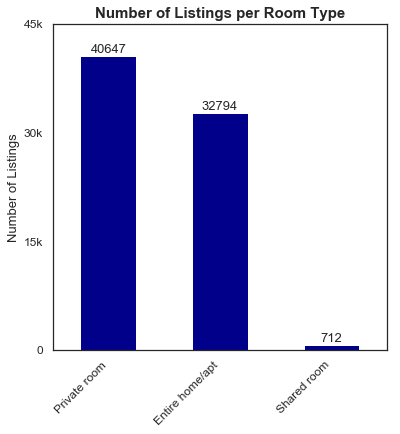

In [112]:

ax = df['room_type'].value_counts().plot.bar(color='darkblue',figsize=(6,6),fontsize=14)


plt.title('Number of Listings per Room Type',fontsize=15,fontweight='bold')
plt.ylabel('Number of Listings',fontsize=13)

# customize ticks for clean looks
ax.set_yticks([0,15000,30000,45000])
ax.set_yticklabels(['0','15k','30k','45k'], fontsize=12)
ax.set_xticklabels(df['room_type'].unique(),fontsize=12)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# make data labels
labels = df['room_type'].value_counts()
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.005, label,
            ha='center', va='bottom',fontsize=13)

#### What's the average price of each room type?

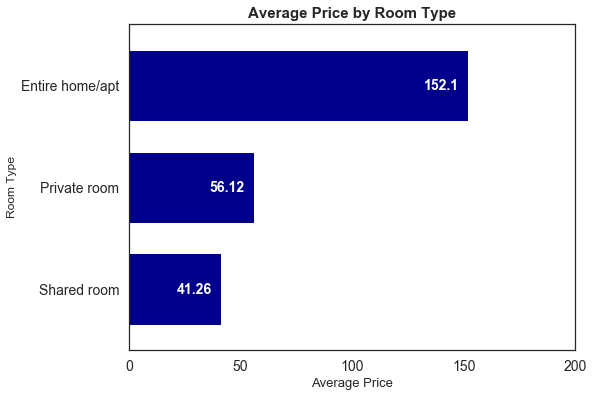

In [142]:
# same charts but with horizontal bar

ax = df.groupby(['room_type'])['price'].mean().sort_values(ascending=True).plot.barh(color='darkblue',
                                                                                     figsize=(8,6),fontsize=14,
                                                                                    width=0.7)

plt.title('Average Price by Room Type',fontsize=15,fontweight='bold')
plt.xlabel('Average Price',fontsize=13)
plt.ylabel('Room Type')

# customize ticks for clean looks
ax.set_xticks([0,50,100,150,200])

#ax.set_xticklabels(['0','15k','30k','45k'], fontsize=12)


# make data labels
labels = df.groupby(['room_type'])['price'].mean().round(decimals=2).sort_values(ascending=True)

rects = ax.patches
for i, v in enumerate(labels):
    ax.text(v - 20, i-0.05 , str(v), color='white', fontweight='bold',fontsize=14)

### Stacked

Now say we want to know the distribution of room types in neighbourhoods with highest number of listings. We will visualize only the top 5.

In [14]:
top_neighbourhoods = df.neighbourhood.value_counts().sort_values(ascending=False)[:5]
top_neighbourhoods

Westminster               7885
Tower Hamlets             7247
Hackney                   5653
Kensington and Chelsea    5274
Camden                    5124
Name: neighbourhood, dtype: int64

Next we make the charts

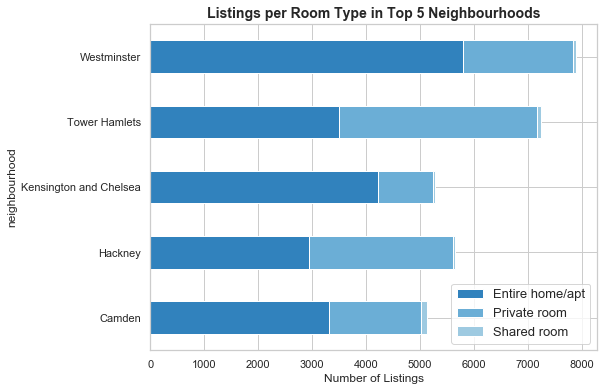

In [68]:
sns.set(style='whitegrid')
# pick color
cmap=plt.cm.get_cmap('tab20c')
colors = [cmap(0),cmap(1),cmap(2)]

#draw chart
df[df.neighbourhood.isin(top_neighbourhoods.index)].groupby(['neighbourhood','room_type'])['id'].count().unstack('room_type').plot.barh(stacked=True
                                                                                                                                       ,color = colors
                                                                                                                                     ,figsize=(8,6))
plt.title('Listings per Room Type in Top 5 Neighbourhoods',fontsize=14,fontweight='bold')
plt.legend(['Entire home/apt','Private room','Shared room'],fontsize=13)
plt.xlabel('Number of Listings')


### 100% Stacked

This is a modification of https://python-graph-gallery.com/13-percent-stacked-barplot/

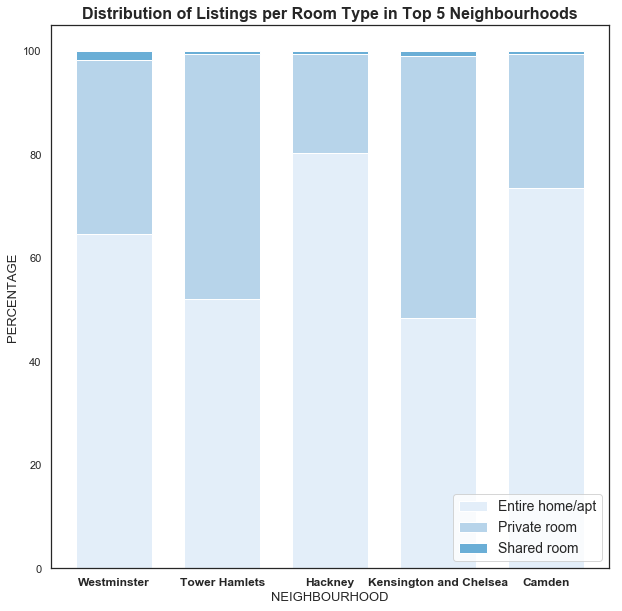

In [125]:
# Data
r = range(1,6)
data = df[df.neighbourhood.isin(top_neighbourhoods.index)].groupby(['neighbourhood','room_type'])['id'].count().unstack('room_type')
 

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(data['Entire home/apt'], data['Private room'], data['Shared room'])]
bar1 = [i / j * 100 for i,j in zip(data['Entire home/apt'], totals)]
bar2 = [i / j * 100 for i,j in zip(data['Private room'], totals)]
bar3 = [i / j * 100 for i,j in zip(data['Shared room'], totals)]
 
# plot
plt.figure(figsize=(10,10))
ax = plt.subplot(111)
cmap=plt.cm.get_cmap('Blues')
colors = [cmap(0.1),cmap(0.3),cmap(0.5)]

barWidth = 0.7
names = (top_neighbourhoods.index)
# Create green Bars
plt.bar(r, bar1, color=colors[0], edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, bar2, bottom=greenBars, color=colors[1], edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, bar3, bottom=[i+j for i,j in zip(bar1, bar2)], color=colors[2], edgecolor='white', width=barWidth)
 
# Custom axis label
plt.xticks(r, names)
plt.xlabel("NEIGHBOURHOOD",fontsize=13)
plt.ylabel('PERCENTAGE',fontsize=13)
plt.setp(plt.gca().get_xticklabels(),fontsize=12,weight='bold')

plt.title('Distribution of Listings per Room Type in Top 5 Neighbourhoods',fontweight='bold',fontsize=16)

'''
# Shrink current axis to make space for legend (if you want axis to be outside the plot)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
'''


ax.legend(['Entire home/apt','Private room','Shared room'],loc=4, fontsize=14)
 

plt.show()


## Doughnut Pie Chart

Suppose someone is planning a budget for a trip, and he's considering to stay in Camden. He considers price per night of <=50 is cheap, 50-100 is okay, and >100 is expensive. Now he wants to figure out, based on his price classification, is Camden generally expensive?

In [170]:
def get_price_category(x):
    if x<=50:
        return 'cheap'
    elif x>100:
        return 'expensive'
    else:
        return 'okay'

In [174]:
df['his_price_category'] = df.price.apply(get_price_category)
# check result
df[['price','his_price_category']].head()

,price,his_price_category
0,35,cheap
1,35,cheap
2,231,expensive
3,51,okay
4,105,expensive


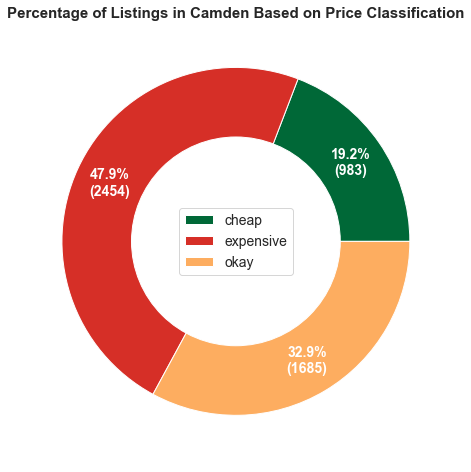

In [216]:

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
my_circle=plt.Circle( (0,0), 0.7, color='white')

# pick colors
cmap=plt.cm.get_cmap('RdYlGn')
colors = [cmap(1.3),cmap(0.1),cmap(0.3)]


def func(pct, allvals):
    # calculate percentage for data labels
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


data = df[df.neighbourhood=='Camden'].groupby('his_price_category')['id'].count().values

# plot and texts
wedges, texts, autotexts = plt.pie(df[df.neighbourhood=='Camden'].groupby('his_price_category')['id'].count(), 
                                   colors=colors,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="b"),pctdistance=0.8)

plt.setp(autotexts, size=14,weight='bold',color='white')

# adding attributes
ax.set_title("Percentage of Listings in Camden Based on Price Classification",fontsize=15,weight='bold')
labels = df[df.neighbourhood=='Camden'].groupby('his_price_category')['id'].count().index
plt.legend(labels,fontsize=14,loc='center')
 
# add circle
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.show()


## Comparing Two Values

Continue from the previous story, after seeing the doughnut pie chart he thinks Camden might be too expensive for him. So he now wants to compare the average price for "cheap" room in Camden and Hackney.